<a href="https://colab.research.google.com/github/KrishnanandSingh/EVA/blob/master/Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thought

Third network's training accuracy was 99.76 and the validation accuracy 99.21. Lets try using batch normalization and dropouts to make the network better.

# Observation

Network achieved the required validation accuracy in 20 epochs with 13,608 parameters. There is still scope of using LR scheduler as the after first few epochs accuracy seems to be increasing and then decreasing.


### **Import Libraries and modules**

Install keras quitely
and import it to be able to use it later

In [1]:
!pip install -q keras
import keras

Using TensorFlow backend.


import the numpy library and refer it as np
import models and layers

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

load the dataset into 2D array(X_train and x_test) representing images
and matrix for their prediction classes(y_train, y_test)

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Check the dimension of X_train, it has sixty thousand images of dimension 28 by 28.

Import the pyplot module from matplotlib to visualise the 2D array representations as images.

Display the output of plotting command below the code block

(60000, 28, 28)


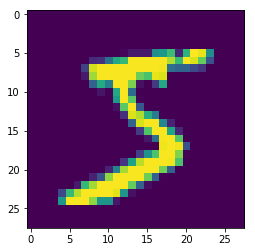

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

 Converting the greyscale image dataset to required input shape for coloured images

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

converting the values to float32 and normalising to convert them in floating values

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

last 10 values from training output

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Convert 1-dimensional class arrays to 10-dimensional class matrices
e.g. converting output 5 to [0,0,0,0,1,0,0,0,0,0]
now our network can predict values for each class 

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Create the model

In [17]:
from keras.layers.normalization import BatchNormalization


from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 5, 5, activation='relu', input_shape=(28,28,1))) #24
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) #12
model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 5, 5, activation='relu')) #8
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) #4
model.add(BatchNormalization())
model.add(Convolution2D(20, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 4)) #1
model.add(BatchNormalization())
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", input_shape=(28, 28, 1...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (1, 1), activation="relu")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 10)        330       
_________________________________________________________________
batch_normalization_8 (Batch (None, 12, 12, 10)        40        
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 32)          8032      
__________

### Train the model

compile the defined model and set configurations to tell how it should learn

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Fitting the model with our training data to start learning.

Look at 32 images at once(batch_size), run 45 times(nb_epoch),  print output(verbose)

In [19]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 21s 354us/step - loss: 0.3850 - acc: 0.9338 - val_loss: 0.1072 - val_acc: 0.9826
Epoch 2/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.1541 - acc: 0.9688 - val_loss: 0.0566 - val_acc: 0.9891
Epoch 3/10
60000/60000 [==============================] - 20s 327us/step - loss: 0.1060 - acc: 0.9766 - val_loss: 0.0462 - val_acc: 0.9895
Epoch 4/10
60000/60000 [==============================] - 21s 343us/step - loss: 0.0840 - acc: 0.9804 - val_loss: 0.0361 - val_acc: 0.9910
Epoch 5/10
60000/60000 [==============================] - 20s 332us/step - loss: 0.0691 - acc: 0.9833 - val_loss: 0.0302 - val_acc: 0.9903
Epoch 6/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.0590 - acc: 0.9855 - val_loss: 0.0289 - val_acc: 0.9922
Epoch 7/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.0525 - acc: 0.9867 - val_loss: 0.

In [20]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
  576/60000 [..............................] - ETA: 19s - loss: 0.0222 - acc: 0.9965

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 21s 352us/step - loss: 0.0374 - acc: 0.9902 - val_loss: 0.0239 - val_acc: 0.9926
Epoch 2/10
60000/60000 [==============================] - 21s 347us/step - loss: 0.0355 - acc: 0.9902 - val_loss: 0.0218 - val_acc: 0.9939
Epoch 3/10
60000/60000 [==============================] - 20s 327us/step - loss: 0.0334 - acc: 0.9908 - val_loss: 0.0206 - val_acc: 0.9940
Epoch 4/10
60000/60000 [==============================] - 20s 338us/step - loss: 0.0315 - acc: 0.9913 - val_loss: 0.0242 - val_acc: 0.9930
Epoch 5/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.0313 - acc: 0.9910 - val_loss: 0.0199 - val_acc: 0.9929
Epoch 6/10
60000/60000 [==============================] - 21s 346us/step - loss: 0.0299 - acc: 0.9916 - val_loss: 0.0233 - val_acc: 0.9928
Epoch 7/10
60000/60000 [==============================] - 20s 326us/step - loss: 0.0273 - acc: 0.9919 - val_loss: 0.0228 - val_acc: 0.9933
Epoch 8/10
60000/60000 [==============

### Evalutate the model on validation data

calculate loss and accuracy

In [21]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.02015105550568551, 0.9945]


get predictions on the validation data

In [22]:
y_pred = model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])

[[5.3875578e-07 3.1047371e-06 1.5342609e-07 6.6570396e-06 1.2678759e-06
  1.5401116e-07 1.1164503e-06 9.9998510e-01 2.7054298e-07 1.5822867e-06]
 [4.5606726e-06 4.1768810e-05 9.9990273e-01 2.3756281e-06 6.2876929e-06
  2.4098489e-08 2.6690972e-05 2.9272252e-07 6.1199285e-07 1.4618376e-05]
 [1.8946261e-05 9.9990582e-01 2.3402157e-07 9.9652618e-07 4.4623139e-06
  1.3145060e-05 1.9153054e-05 1.2744529e-05 3.8137232e-06 2.0703781e-05]
 [9.9994123e-01 5.9277077e-06 1.6693498e-06 1.5698893e-06 3.6408576e-08
  7.0107092e-07 2.1802129e-05 7.1503641e-06 3.1383672e-06 1.6760296e-05]
 [1.5242740e-05 6.6317807e-05 9.1649881e-06 1.1851693e-05 9.9982423e-01
  1.2998086e-06 3.7624802e-06 8.6311738e-06 3.0930656e-05 2.8596200e-05]
 [7.2192397e-06 9.9993944e-01 2.2744170e-07 2.2420743e-07 6.5449881e-06
  1.4438906e-06 2.1335372e-06 2.4506366e-05 3.2119372e-06 1.4946791e-05]
 [5.9800010e-07 2.9079703e-05 1.6931375e-06 7.3782263e-07 9.9967754e-01
  1.2995287e-06 3.6464207e-05 3.6093010e-07 2.4267235e-04 

### Visualising what filters are trying to extract

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

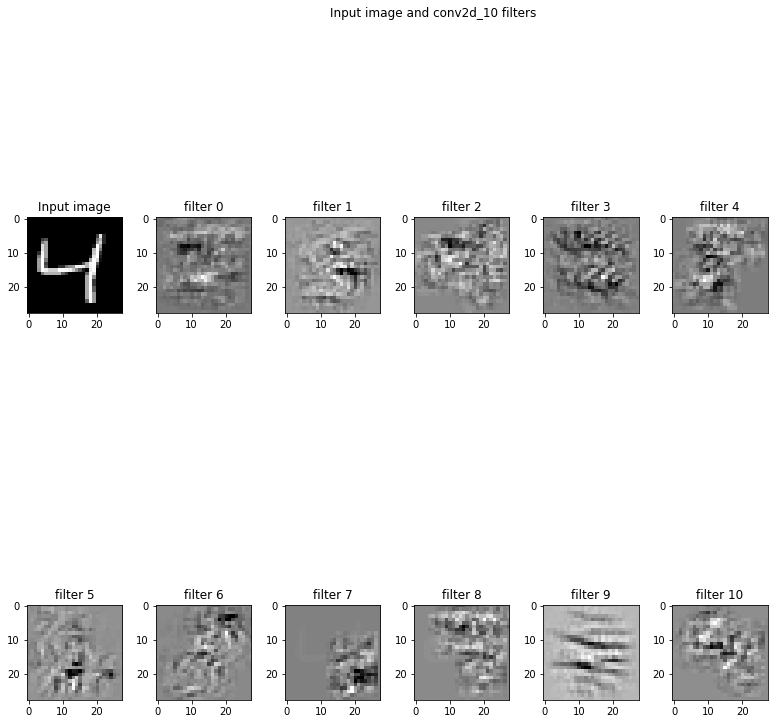

In [26]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter(layer_name='conv2d_10')